Ingrese el tamaño del mapa (ej. 10 para un mapa 10x10): 20
Ingrese la proporción de áreas bloqueadas (ej. 0.2 para un 20% bloqueado): 0.1
Seleccione el método de heurística (manhattan/euclidean): manhattan

Mapa generado:
[[0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0]
 [0 

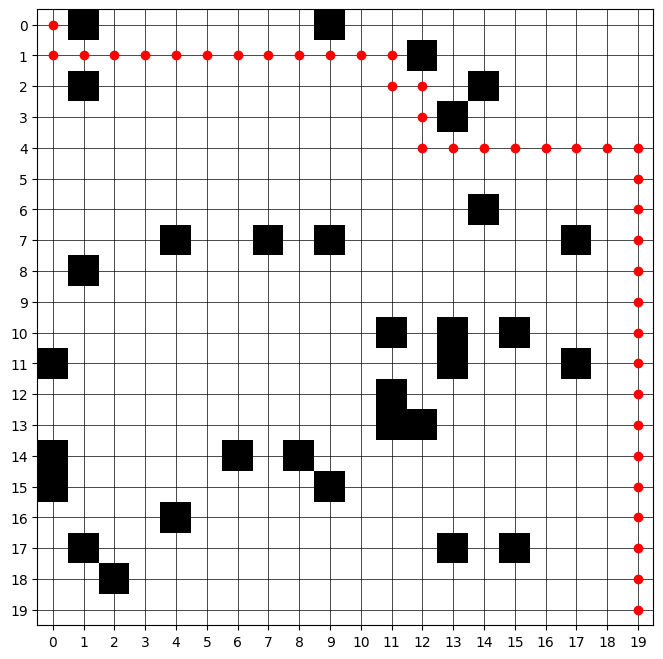

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import heapq

def generate_map(size, blocked_ratio):
    """Genera un mapa cuadrado con áreas transitables y bloqueadas."""
    grid = np.random.choice([0, 1], size=(size, size), p=[1 - blocked_ratio, blocked_ratio])
    return grid

def heuristic(a, b, method):
    """Calcula la heurística según el método elegido."""
    if method == "manhattan":
        return abs(a[0] - b[0]) + abs(a[1] - b[1])
    elif method == "euclidean":
        return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

def a_star_search(grid, start, goal, method):
    """Implementación del algoritmo A* para encontrar rutas óptimas."""
    rows, cols = grid.shape
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal, method)}

    while open_set:
        _, current = heapq.heappop(open_set)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            distancia_total = sum(
                heuristic(path[i], path[i+1], method) for i in range(len(path)-1)
            )
            return path, distancia_total

        if method == "manhattan":
            neighbors = [(current[0] + i, current[1] + j) for i, j in [(-1, 0), (1, 0), (0, -1), (0, 1)]]
        else:
            neighbors = [(current[0] + i, current[1] + j) for i, j in [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]]

        for neighbor in neighbors:
            if (0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor] == 0):
                tentative_g_score = g_score[current] + heuristic(current, neighbor, method)

                if tentative_g_score < g_score.get(neighbor, float("inf")):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal, method)
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None, None

def visualize_map(grid, path=None):
    """Muestra el mapa y la ruta encontrada."""
    plt.figure(figsize=(8, 8))
    plt.imshow(grid, cmap="Greys", origin="upper")
    if path:
        for (x, y) in path:
            plt.plot(y, x, "ro")
    plt.grid(True, which="both", color="black", linewidth=0.5)
    plt.xticks(range(grid.shape[1]))
    plt.yticks(range(grid.shape[0]))
    plt.show()

def main():
    size = int(input("Ingrese el tamaño del mapa (ej. 10 para un mapa 10x10): "))
    blocked_ratio = float(input("Ingrese la proporción de áreas bloqueadas (ej. 0.2 para un 20% bloqueado): "))
    method = input("Seleccione el método de heurística (manhattan/euclidean): ").strip().lower()

    if method not in ["manhattan", "euclidean"]:
        print("Método inválido. Debe ser 'manhattan' o 'euclidean'.")
        return

    grid = generate_map(size, blocked_ratio)

    print("\nMapa generado:")
    print(grid)

    start = tuple(map(int, input("Ingrese las coordenadas de inicio (fila columna, ej. 0 0): ").split()))
    goal = tuple(map(int, input("Ingrese las coordenadas de destino (fila columna, ej. 9 9): ").split()))

    if grid[start] == 1 or grid[goal] == 1:
        print("\nError: Inicio o destino en una casilla bloqueada.")
        return

    path, distancia_total = a_star_search(grid, start, goal, method)

    if path:
        print("\nRuta encontrada:", path)
        print(f"\nDistancia Total Recorrida: {distancia_total:.2f}")
        visualize_map(grid, path)
    else:
        print("\nNo se encontró una ruta.")

if __name__ == "__main__":
    main()
